# Asset Allocation with Unsupervised Machine Learning Techniques

Suppose we have $M$ assets with prices $\left\{ S_t^{(k)} \right\}_{k=1}^M$, where the quantity of the $k$-th asset at time $t$ is denoted by $x_t^{(k)}$. The investment in the $k$-th asset at time $t$ is given by $V_t^{(k)} = S_t^{(k)} \cdot x_t^{(k)}$. Since a portfolio is a linear combination of financial assets, the value of the portfolio $\Pi_{t}$ at each instant is determined by the specific combination of assets held at that moment:

$$
\Pi_{t} = \sum_{k=1}^M V_t^{(k)}
$$

The value of a portfolio can change either due to a change in the prices of the assets it contains, a rebalancing of its composition, or both. Generally, the returns of the assets over a given investment horizon are represented by an $M$-dimensional random vector $\mathbf{R}_{t}$, defined as:

$$
\mathbf{R}_{t} = \left[ R_t^{(1)}, R_t^{(2)}, \dots, R_t^{(M)} \right]^T
$$

where $R_t^{(k)} = \frac{S_{t+1}^{(k)} - S_t^{(k)}}{S_t^{(k)}}, \,\,\, \forall k = 1, 2, \dots, M$. The expected return of the assets over an investment horizon is then a real (deterministic) vector given by the expected value of the random return vector, i.e.,

$$
\boldsymbol{\mu}_{t} = \mathbb{E}\left[\mathbf{R}_{t}\right] \in \mathbb{R}^M
$$

The return of a portfolio is the percentage change in the $\text{P\&L}$ based on an initial reference level, which can be taken as the size of the initial position. The $\text{P\&L}$ (Profit and Loss) refers to the economic outcome of a trading operation over a certain period. This can be due to capital appreciations of a portfolio $\Pi_{t}$, the receipt of dividends from stocks, coupon payments from bonds, etc. Mathematically, we can express the $\text{P\&L}$ in discrete time as $\text{P\&L}_{t+1} = \Delta\Pi_{t+1} = \Pi_t - \Pi_{t-1}$. Thus, the return of a portfolio over an investment horizon $\Delta t$ is given by:

$$
\begin{split}
R_{\mathbf{w}} & = \frac{\Pi_{t+1} - \Pi_t}{\Pi_{t}} \\
               & = \frac{\sum_{k=1}^M V_{t+1}^{(k)} - \sum_{k=1}^M V_t^{(k)}}{\Pi_t} \\
               & = \frac{\sum_{k=1}^M \left( V_{t+1}^{(k)} - V_t^{(k)}\right)}{\Pi_t} \\
               & = \frac{\sum_{k=1}^M \Delta V_{t+1}^{(k)}}{\Pi_t} \\
               & = \sum_{k=1}^M \frac{\Delta V_{t+1}^{(k)}}{\Pi_t} \\
               & = \sum_{k=1}^M \frac{V_t^{(k)}}{\Pi_t} \frac{\Delta V_{t+1}^{(k)}}{V_t^{(k)}} \\
               & = \sum_{k=1}^M \frac{V_t^{(k)}}{\sum_{k=1}^M V_t^{(k)}} \frac{\Delta V_{t+1}^{(k)}}{V_t^{(k)}} \\
\end{split}
$$

Assuming the quantity of the $k$-th asset $x_t^{(k)}$ remains fixed during the investment horizon, the term $\frac{\Delta V_{t+1}^{(k)}}{V_t^{(k)}}$ equals the return of the $k$-th asset at time $t$. Moreover, defining the portfolio weight of the $k$-th asset at time $t$ as:

$$
w_t^{(k)} = \frac{V_t^{(k)}}{\Pi_{t}} = \frac{V_t^{(k)}}{\sum_{k=1}^M V_t^{(k)}}
$$

we find that the discrete return of the entire portfolio can be written as the weighted average of the discrete returns of its constituent assets:

$$
R_{\mathbf{w}} = \sum_{k=1}^M w_t^{(k)} R_t^{(k)}
$$

In finance, if $w_t^{(k)} > 0$, the $k$-th asset is said to be "Long", and if $w_t^{(k)} < 0$, the $k$-th asset is said to be "Short".

To simplify the notation, we can define the portfolio composition as an $M$-component vector where each component represents the individual weights of each asset:

$$
\mathbf{w}_t = \mathbf{w}_t(\mathbf{S}_t) = \left[ w_t^{(1)}, w_t^{(2)}, \dots, w_t^{(M)} \right]^T
$$

Therefore, the discrete return of the entire portfolio over the holding period is given by:

$$
R_{\mathbf{w}} = \mathbf{w}_t^T\mathbf{R}_t
$$

and the expected return of the portfolio $\Pi$ is:

$$
\mu_{\Pi} = \mathbb{E}\left[ R_{\mathbf{w}} \right] = \mathbb{E}\left[ \mathbf{w}_t^T\mathbf{R}_t \right] = \mathbf{w}_t^T \mathbb{E}\left[ \mathbf{R}_t \right] = \mathbf{w}_t^T \boldsymbol{\mu}_{t} \in \mathbb{R}
$$

Another important quantity to measure is the risk, which can be defined as the variation between what is expected and what is observed. If we expect the return of an asset, it is reasonable to think of risk as the fluctuation of the expected return. There are several metrics to measure this fluctuation, but in this project, we will use **variance**. On one hand, if we calculate the variance of the return vector:

$$
\begin{split}
\text{Var}\left[ \mathbf{R}_{t} \right] 
& = \mathbb{E}\left[ \left(\mathbf{R}_{t} - \mathbb{E}\left[ \mathbf{R}_{t} \right] \right)^2 \right] \\
& = \mathbb{E}\left[ \left(\mathbf{R}_{t} - \boldsymbol{\mu}_{t} \right)\left(\mathbf{R}_{t} - \boldsymbol{\mu}_{t} \right)^T \right] \\ \\
& = \mathbb{E}
\left[  
\begin{pmatrix}
R_t^{(1)} - \mu_t^{(1)} \\ \\
\vdots \\
R_t^{(M)} - \mu_t^{(M)}
\end{pmatrix}
\left( R_t^{(1)} - \mu_t^{(1)}, \dots, R_t^{(M)} - \mu_t^{(M)} \right)
\right] \\ \\
& = 
\begin{pmatrix}
\mathbb{E}\left[ \left(R_t^{(1)} - \mu_t^{(1)}\right)\left(R_t^{(1)} - \mu_t^{(1)}\right) \right] & \cdots & \mathbb{E}\left[ \left(R_t^{(1)} - \mu_t^{(1)}\right)\left(R_t^{(M)} - \mu_t^{(M)}\right)\right]\\
\vdots & \ddots & \vdots \\
\mathbb{E}\left[\left(R_t^{(M)} - \mu_t^{(M)}\right)\left(R_t^{(1)} - \mu_t^{(1)}\right)\right] & \cdots & \mathbb{E}\left[ \left(R_t^{(M)} - \mu_t^{(M)}\right)\left(R_t^{(M)} - \mu_t^{(M)}\right)\right]
\end{pmatrix} \\ \\
& =
\begin{pmatrix}
\text{Var}\left[ R_t^{(1)} \right] & \cdots & \text{Cov}\left[ R_t^{(1)}, R_t^{(M)} \right]\\
\vdots & \ddots & \vdots \\
\text{Cov}\left[ R_t^{(M)}, R_t^{(1)} \right] & \cdots & \text{Var}\left[ R_t^{(M)} \right]
\end{pmatrix} \\ \\
& = \boldsymbol{\Sigma}_t
\end{split}
$$

In other words, the variance of the random return vector is the covariance matrix. Using this expression, we can calculate the portfolio risk as follows:

$$
\begin{split}
\text{Var}\left[ R_{\mathbf{w}} \right] 
& = \text{Var}\left[ \mathbf{w}_t^T\mathbf{R}_t \right] \\
& = \mathbb{E}\left[ \left( \mathbf{w}_t^T\mathbf{R}_t - \mathbf{w}_t^T\boldsymbol{\mu}_{t} \right)\left( \mathbf{w}_t^T\mathbf{R}_t - \mathbf{w}_t^T\boldsymbol{\mu}_{t} \right)^T \right] \\
& = \mathbb{E}\left[ \mathbf{w}_t^T \left(\mathbf{R}_t - \boldsymbol{\mu}_{t}\right)\left(\mathbf{R}_t - \boldsymbol{\mu}_{t}\right)^T \mathbf{w}_t \right] \\
& = \mathbf{w}_t^T \mathbb{E}\left[\left(\mathbf{R}_t - \boldsymbol{\mu}_{t}\right)\left(\mathbf{R}_t - \boldsymbol{\mu}_{t}\right)^T \right]\mathbf{w}_t \\ \\
& = \mathbf{w}_t^T \boldsymbol{\Sigma}_t\mathbf{w}_t \in \mathbb{R}
\end{split}
$$

## Principal Portfolios Approach

So far, we have established the following:

- **Portfolio composition** $\Pi$ at each time $t$: $\mathbf{w}_t$
- **Portfolio return**: $R_{\mathbf{w}} = \mathbf{w}_t^T\mathbf{R}_t$
- **Expected portfolio return**: $\mu_\Pi = \mathbb{E}\left[ R_{\mathbf{w}} \right] = \mathbf{w}_t^T \boldsymbol{\mu}_{t}$
- **Portfolio risk**: $\text{Var}\left[ R_{\mathbf{w}} \right] = \sigma_\Pi^2 = \mathbf{w}_t^T \boldsymbol{\Sigma}_t\mathbf{w}_t$

At this stage, it's relevant to ask whether it's possible to choose the portfolio composition $\mathbf{w}_t$ in such a way that it provides an optimal balance between risk and return. There are various approaches to tackle this problem, with perhaps the most well-known being the **Modern Portfolio Theory** developed by **Harry Markowitz** in 1952. However, in this project, we will take a different approach based on a widely recognized unsupervised machine learning technique called **Principal Component Analysis (PCA)**.

### Methodology for Maximally Diversified Portfolios Based on PCA

We propose a methodology based on Principal Component Analysis (PCA) for constructing maximally diversified portfolios. In uncorrelated markets, the individual values of a generic portfolio $R_{\mathbf{w}} = \mathbf{w}^T\mathbf{R}$ represent additive sources of risk:

$$
\text{Var}\left[ \tilde{R}_{\mathbf{w}} \right] = \sum_{j=1}^M \text{Var}\left[ \tilde{w}_j \tilde{R}_j\right]
$$

Therefore, in uncorrelated markets, maximum diversification corresponds to equal weights adjusted by variance. In correlated markets, this is not the case. However, even when market values are correlated, it is still possible to identify uncorrelated sources of risk, which are additive. The most natural choice for uncorrelated sources of risk is provided by the principal component decomposition of the covariance of returns.

Our strategy is to decompose the original set of assets into principal portfolios, knowing that these portfolios will be uncorrelated. To optimize diversification, we can set the weights for the principal portfolios as follows:

$$
\tilde{w}_j = \frac{\frac{1}{\lambda_j}}{\sum_{j=1}^M\frac{1}{\lambda_j}}, \,\,\, \sum_{j=1}^M \tilde{w}_j = 1
$$

Since, as mentioned above, in uncorrelated markets, maximum diversification corresponds to equal weights adjusted by variance.

On the other hand, we know that the dot product is invariant under rotations, so:

$$
R_{\mathbf{w}} = \mathbf{w}^T\mathbf{R} = \mathbf{w}^T\boldsymbol{\Gamma}\boldsymbol{\Gamma}^T\mathbf{R} = \left(\boldsymbol{\Gamma}^T\mathbf{w}\right)^T\boldsymbol{\Gamma}^T\mathbf{R} =  \tilde{\mathbf{w}}^T\tilde{\mathbf{R}} = \tilde{R}_{\mathbf{w}}
$$

We observe that a generic portfolio can be viewed as a combination of the original values with weights $\mathbf{w}$ or as a combination of uncorrelated principal portfolios with weights $\tilde{\mathbf{w}} \equiv \boldsymbol{\Gamma}^T \mathbf{w} = \boldsymbol{\Gamma}^{-1}\mathbf{w}$, and whose returns $\tilde{R}_{\mathbf{w}} \equiv \boldsymbol{\Gamma}^TR_{\mathbf{w}} = \boldsymbol{\Gamma}^{-1}R_{\mathbf{w}}$ are progressively less responsible for the randomness of the portfolio.

Therefore, we can recover the original weights by applying the rotation matrix to the weights $\tilde{w}_j$.

It is important to highlight that by weighting by the inverse of the variances, the impact of the most volatile assets on the portfolio is reduced, which tends to lower the overall risk. This approach is particularly useful when the assets are uncorrelated or weakly correlated. This strategy offers an effective way to manage risk by giving more weight to assets that are intrinsically less risky. If we apply this strategy in the space of principal portfolios, we would be mitigating the risk of each principal portfolio according to its variance (eigenvalue). The advantages of this strategy are simplicity and ease of implementation, in addition to effectively reducing the total risk of the portfolio, especially when the assets have different levels of volatility. On the other hand, the downside of our approach is that it does not consider the correlation between assets, which may limit the effectiveness of diversification if the assets are highly correlated and may lead to concentration in low-variance assets, potentially limiting the return.

Finally, we note that the weights in our strategy do not necessarily have to be set for all $M$ principal portfolios; they can be adjusted for $q < M$ of them, leaving the remaining weights at 0, depending on the risk profile the investor wishes to assume and the return they want to achieve. This also allows for a reduction in the dimensionality of the problem for portfolios with many assets.


## `Python` Implementation

### Financial Data

The data used in this project includes detailed information on the prices of financial assets, structured into the following fields:

- **Date**: The specific date on which the financial data was recorded. This field is essential for analyzing time series and observing trends over time.

- **Open**: The price at which the asset began trading in the corresponding market session. It represents the first traded value of the day and can indicate market sentiment at the start of the session.

- **High**: The highest price reached by the asset during the market session. This value reflects the maximum buying interest on that date.

- **Low**: The lowest price at which the asset was traded during the same session. It provides information on the minimum level at which sellers were willing to transact.

- **Close**: The final price at which the asset's trading ended in the market session. This is one of the most important prices for technical analysis and for evaluating the asset's performance at the end of the day.

- **Adj Close**: The adjusted closing price, which accounts for corporate actions like dividends or stock splits. This adjustment allows for a more accurate historical analysis by reflecting the asset's true value based on its current characteristics.

- **Volume**: The total number of shares traded during the market session. Volume is a key indicator of the asset's liquidity and investor interest on that day.

- **Ticker**: The unique symbol that identifies the asset in the stock market. This identifier is used for quick queries and analysis of the specific asset.


In [10]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [11]:
# Set random seed for reproducibility
np.random.seed(123)

# Read available tables from Wikipedia page on S&P 500 components
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")

# Select the first table
spx_components = tables[0]

# Set 'Symbol' as the index
spx_components = spx_components.set_index('Symbol')

# Replace '.' with '-' to match Yahoo Finance tickers format
spx_components['YF Tickers'] = spx_components.index.str.replace('.', '-', regex=False)

# Create a list of tickers and sectors, sorted alphabetically
tickers_list = spx_components[['YF Tickers', 'GICS Sector']]

# Randomly select one ticker per sector to have a balanced sample (no repetition)
tickers_sample = tickers_list.groupby('GICS Sector').sample(n=1, random_state=77)

# Convert the selected tickers to a list
tickers_sample = tickers_sample['YF Tickers'].to_list()

# Create a DataFrame to store relevant variables
historical_data = pd.DataFrame()

# Iterate over each selected ticker to get relevant data
for ticker in tickers_sample:
    try:
        # Download historical data from Yahoo Finance
        ticker_data = yf.download(ticker, start="2015-01-01", end="2024-08-01")
        ticker_data['Ticker'] = ticker
        historical_data = pd.concat([historical_data, ticker_data])
    except Exception as e:
        print(f"Could not download data for {ticker}: {e}")

# Drop rows with missing data
historical_data.dropna(inplace=True)

# Reset index
historical_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
# Display the first few rows of the processed DataFrame
historical_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2015-01-02,15.13,15.28,14.80,14.98,13.284019,905000,NWS
1,2015-01-05,14.91,14.91,14.53,14.64,12.982514,1018500,NWS
2,2015-01-06,14.65,14.67,14.32,14.47,12.831759,1197100,NWS
3,2015-01-07,14.57,14.57,14.25,14.41,12.778552,1074300,NWS
4,2015-01-08,14.52,14.84,14.43,14.74,13.071189,887000,NWS


In [13]:
# Download daily price series for the selected tickers
sp_comp_daily_prices = yf.download(
    tickers=tickers_sample,
    interval='1d',           # Daily interval
    start='2015-01-01',      # Start date
    end='2023-04-30',        # End date
    group_by='ticker',       # Group data by ticker
    auto_adjust=True,        # Adjust for corporate actions (splits, dividends)
    prepost=True,            # Include pre-market and after-hours data
    threads=True             # Use multiple threads for downloading
)

# Define a function to clean and organize the data
def format_df(df):
    # Flatten MultiIndex columns to single level with '_'
    df.columns = [ '_'.join(x) for x in df.columns ]
    # Select only columns that end with '_Close'
    df = df.loc[:, df.columns.str.endswith('_Close')]
    # Remove the '_Close' suffix from column names
    df.columns = df.columns.str.replace(r'_Close', '')
    return df

# Apply the function to the downloaded data
sp_comp_close_prices = format_df(sp_comp_daily_prices)

# Ensure the 'Date' index contains only the date, removing the time component
sp_comp_close_prices.index = pd.to_datetime(sp_comp_close_prices.index).date

# Rename the index to 'Date'
sp_comp_close_prices.index.name = 'Date'

# Display the first few rows of the cleaned DataFrame
sp_comp_close_prices.head()

[*********************100%***********************]  11 of 11 completed


,MPC,MA,SBAC,NWS,ISRG,HON,PPL,CHD,TJX,LIN,MSI
Date,,,,,,,,,,,
2015-01-02,33.638409,80.673027,105.086281,13.284019,58.396667,78.093651,21.569206,34.660130,29.645496,108.083336,56.538246
2015-01-05,32.702381,78.403877,103.429077,12.982512,57.152222,76.605484,21.070908,34.274483,29.313978,105.230515,55.305649
2015-01-06,32.379356,78.234398,102.889305,12.831759,57.754444,76.426270,21.064976,33.989632,29.170013,103.883102,54.838100
2015-01-07,32.647316,79.451355,104.300278,12.778551,58.071110,76.979424,21.159878,34.370903,29.767637,105.047531,54.770100
2015-01-08,33.414490,80.687187,105.341957,13.071191,59.222221,78.381912,21.076838,35.050167,29.924677,106.777512,55.620163


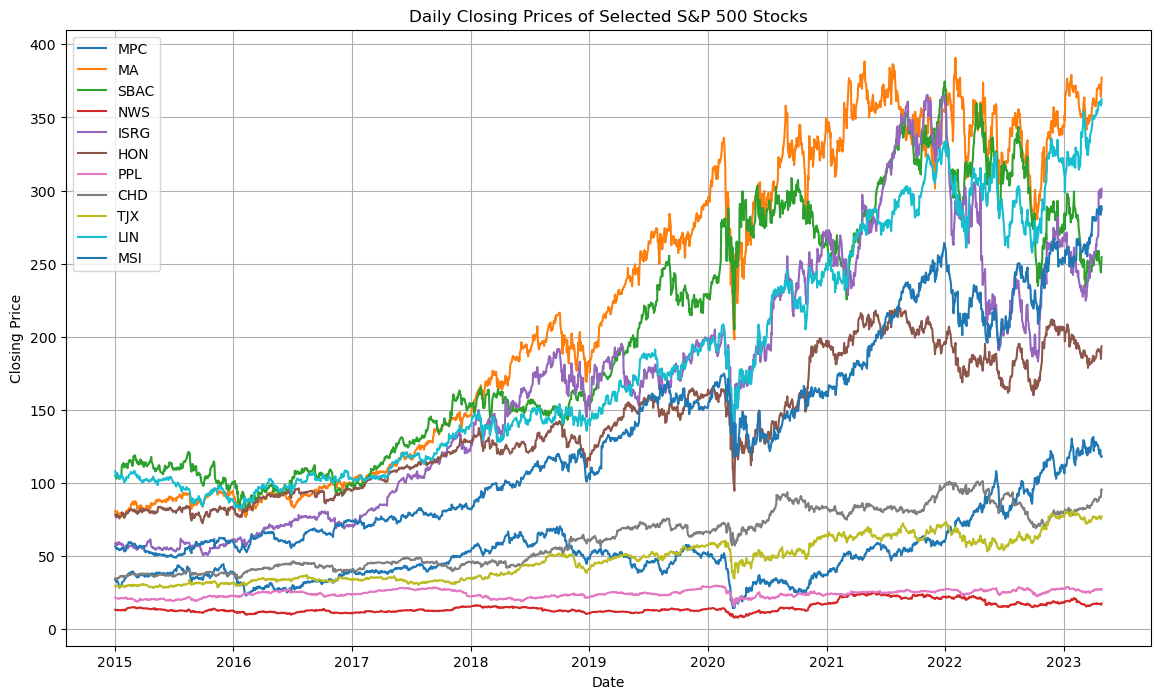

In [14]:
# Plot the closing prices for all tickers
plt.figure(figsize=(14, 8))

for ticker in sp_comp_close_prices.columns:
    plt.plot(sp_comp_close_prices.index, sp_comp_close_prices[ticker], label=ticker)

# Add titles and labels
plt.title('Daily Closing Prices of Selected S&P 500 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()  # Show legend to differentiate the tickers
plt.grid(True)

# Show the plot
plt.show()

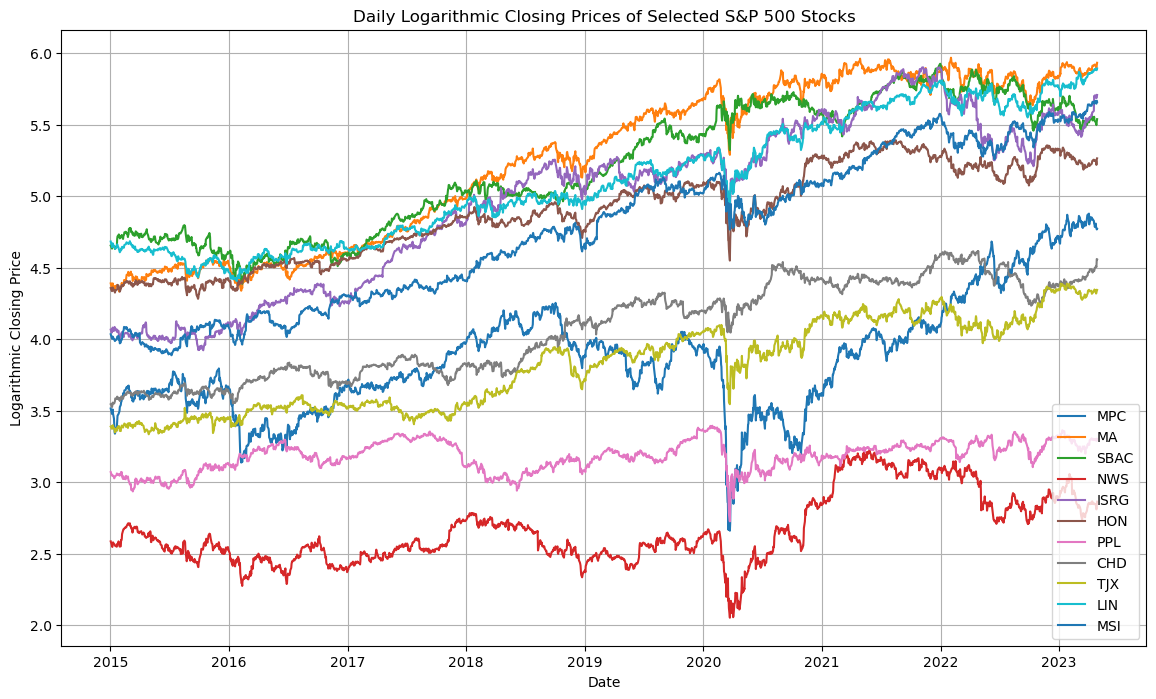

In [15]:
# Calculate the logarithmic prices
sp_comp_log_prices = np.log(sp_comp_close_prices)

# Plot the logarithmic prices for all tickers
plt.figure(figsize=(14, 8))

for ticker in sp_comp_log_prices.columns:
    plt.plot(sp_comp_log_prices.index, sp_comp_log_prices[ticker], label=ticker)

# Add titles and labels
plt.title('Daily Logarithmic Closing Prices of Selected S&P 500 Stocks')
plt.xlabel('Date')
plt.ylabel('Logarithmic Closing Price')
plt.legend()  # Show legend to differentiate the tickers
plt.grid(True)

# Show the plot
plt.show()

In [16]:
# Calculate daily simple returns
daily_returns = sp_comp_close_prices.pct_change().dropna()

# Display the first few rows of the daily returns DataFrame
daily_returns.head()

,MPC,MA,SBAC,NWS,ISRG,HON,PPL,CHD,TJX,LIN,MSI
Date,,,,,,,,,,,
2015-01-05,-0.027826,-0.028128,-0.015770,-0.022697,-0.021310,-0.019056,-0.023102,-0.011127,-0.011183,-0.026395,-0.021801
2015-01-06,-0.009878,-0.002162,-0.005219,-0.011612,0.010537,-0.002339,-0.000282,-0.008311,-0.004911,-0.012804,-0.008454
2015-01-07,0.008276,0.015555,0.013714,-0.004147,0.005483,0.007238,0.004505,0.011217,0.020488,0.011209,-0.001240
2015-01-08,0.023499,0.015555,0.009987,0.022901,0.019822,0.018219,-0.003924,0.019763,0.005276,0.016469,0.015521
2015-01-09,-0.027903,-0.012744,-0.003506,0.009498,-0.022758,-0.016600,-0.005066,-0.003251,-0.012391,-0.013476,-0.004891


In [17]:
# Shape of the daily returns
daily_returns.shape

(2094, 11)

In [18]:
# Summary statistics
daily_returns.describe()

,MPC,MA,SBAC,NWS,ISRG,HON,PPL,CHD,TJX,LIN,MSI
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,0.000967,0.000896,0.000570,0.000327,0.000983,0.000544,0.000225,0.000578,0.000612,0.000692,0.000910
std,0.026981,0.017859,0.017189,0.019661,0.019938,0.014916,0.015072,0.013673,0.017596,0.015097,0.016383
min,-0.270089,-0.127255,-0.089326,-0.145522,-0.143362,-0.120868,-0.137126,-0.085646,-0.203995,-0.102833,-0.119574
25%,-0.012027,-0.007274,-0.007611,-0.009537,-0.008043,-0.005857,-0.006109,-0.006094,-0.007718,-0.006900,-0.006706
50%,0.001722,0.001465,0.000832,0.000000,0.001538,0.000888,0.000682,0.000940,0.000481,0.000506,0.001094
75%,0.014181,0.009368,0.009141,0.009990,0.010296,0.007509,0.007814,0.007598,0.008860,0.008438,0.008577
max,0.206286,0.166109,0.124292,0.132931,0.174439,0.150684,0.142550,0.136687,0.129032,0.116947,0.141207


In [19]:
# Data types and non-null values
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 2015-01-05 to 2023-04-28
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPC     2094 non-null   float64
 1   MA      2094 non-null   float64
 2   SBAC    2094 non-null   float64
 3   NWS     2094 non-null   float64
 4   ISRG    2094 non-null   float64
 5   HON     2094 non-null   float64
 6   PPL     2094 non-null   float64
 7   CHD     2094 non-null   float64
 8   TJX     2094 non-null   float64
 9   LIN     2094 non-null   float64
 10  MSI     2094 non-null   float64
dtypes: float64(11)
memory usage: 196.3+ KB


In [20]:
# Count missing values
daily_returns.isna().sum()

MPC     0
MA      0
SBAC    0
NWS     0
ISRG    0
HON     0
PPL     0
CHD     0
TJX     0
LIN     0
MSI     0
dtype: int64

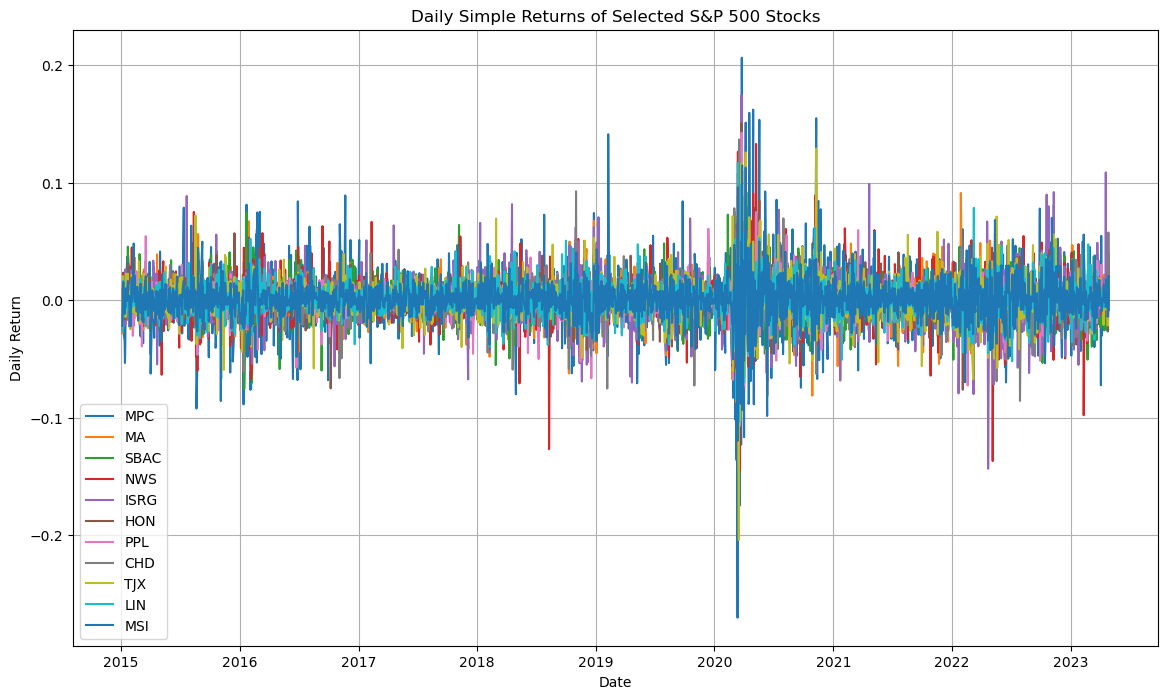

In [21]:
# Plot the daily returns for all tickers
plt.figure(figsize=(14, 8))

for ticker in daily_returns.columns:
    plt.plot(daily_returns.index, daily_returns[ticker], label=ticker)

# Add titles and labels
plt.title('Daily Simple Returns of Selected S&P 500 Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()  # Show legend to differentiate the tickers
plt.grid(True)

# Show the plot
plt.show()

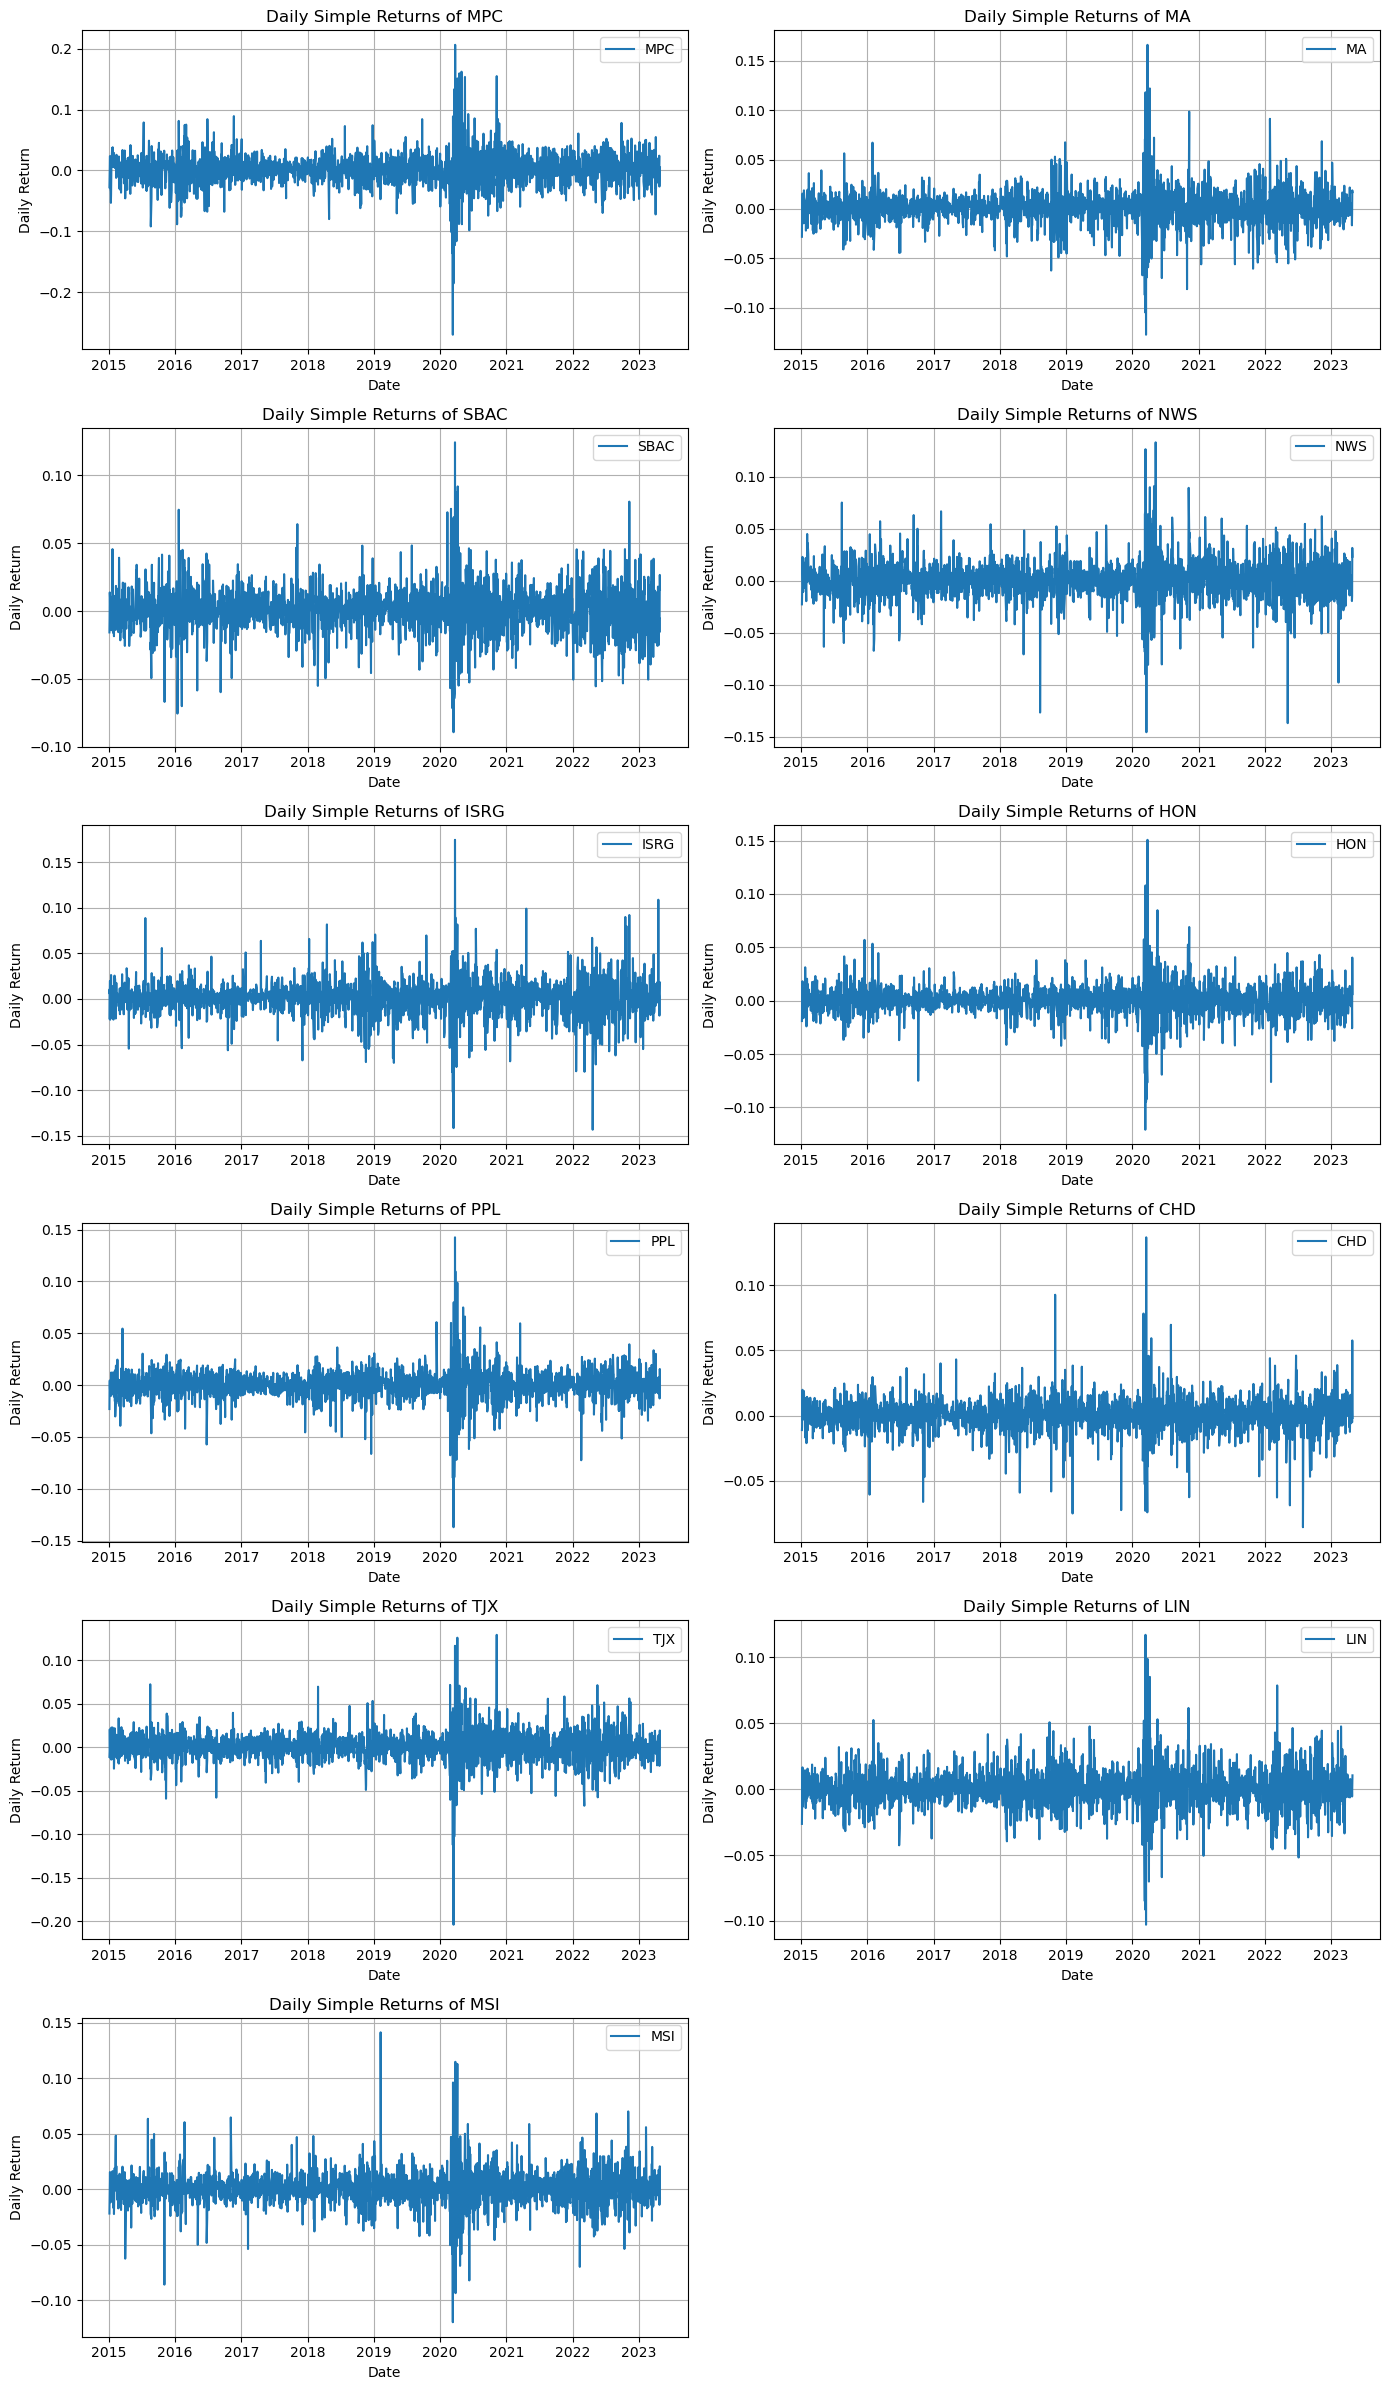

In [22]:
# Define the number of rows and columns for the subplots
nrows = len(daily_returns.columns) // 2 + len(daily_returns.columns) % 2
ncols = 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each ticker and plot its daily returns in the corresponding subplot
for i, ticker in enumerate(daily_returns.columns):
    axes[i].plot(daily_returns.index, daily_returns[ticker], label=ticker)
    
    # Add titles and labels to each subplot
    axes[i].set_title(f'Daily Simple Returns of {ticker}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Daily Return')
    axes[i].grid(True)
    axes[i].legend()

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
# Calculate the covariance matrix of the daily returns
cov_matrix = daily_returns.cov()

# Display the covariance matrix
display(cov_matrix)

,MPC,MA,SBAC,NWS,ISRG,HON,PPL,CHD,TJX,LIN,MSI
MPC,0.000728,0.000235,0.000103,0.000234,0.000194,0.000222,0.000158,0.000037,0.000214,0.000183,0.000168
MA,0.000235,0.000319,0.000133,0.000175,0.000223,0.000172,0.000114,0.000062,0.000177,0.000163,0.000161
SBAC,0.000103,0.000133,0.000295,0.000101,0.000149,0.000099,0.000119,0.000088,0.000094,0.000104,0.000111
NWS,0.000234,0.000175,0.000101,0.000387,0.000164,0.000160,0.000109,0.000049,0.000151,0.000147,0.000130
ISRG,0.000194,0.000223,0.000149,0.000164,0.000398,0.000158,0.000113,0.000069,0.000155,0.000157,0.000160
HON,0.000222,0.000172,0.000099,0.000160,0.000158,0.000222,0.000120,0.000050,0.000153,0.000144,0.000132
PPL,0.000158,0.000114,0.000119,0.000109,0.000113,0.000120,0.000227,0.000069,0.000116,0.000100,0.000100
CHD,0.000037,0.000062,0.000088,0.000049,0.000069,0.000050,0.000069,0.000187,0.000049,0.000058,0.000065
TJX,0.000214,0.000177,0.000094,0.000151,0.000155,0.000153,0.000116,0.000049,0.000310,0.000126,0.000134
LIN,0.000183,0.000163,0.000104,0.000147,0.000157,0.000144,0.000100,0.000058,0.000126,0.000228,0.000124


,MPC,MA,SBAC,NWS,ISRG,HON,PPL,CHD,TJX,LIN,MSI
MPC,1.000000,0.487156,0.221379,0.441501,0.361341,0.550818,0.388971,0.100536,0.450989,0.449148,0.379657
MA,0.487156,1.000000,0.431690,0.499222,0.626741,0.647254,0.425333,0.251961,0.564171,0.604753,0.548993
SBAC,0.221379,0.431690,1.000000,0.298961,0.434549,0.386391,0.460462,0.372970,0.312237,0.400209,0.392593
NWS,0.441501,0.499222,0.298961,1.000000,0.417940,0.544951,0.368674,0.180893,0.437872,0.494109,0.404697
ISRG,0.361341,0.626741,0.434549,0.417940,1.000000,0.530164,0.374703,0.253325,0.442756,0.520007,0.488454
HON,0.550818,0.647254,0.386391,0.544951,0.530164,1.000000,0.535238,0.247582,0.584179,0.641557,0.539089
PPL,0.388971,0.425333,0.460462,0.368674,0.374703,0.535238,1.000000,0.336401,0.437827,0.439797,0.405775
CHD,0.100536,0.251961,0.372970,0.180893,0.253325,0.247582,0.336401,1.000000,0.205523,0.280511,0.292103
TJX,0.450989,0.564171,0.312237,0.437872,0.442756,0.584179,0.437827,0.205523,1.000000,0.474899,0.465916
LIN,0.449148,0.604753,0.400209,0.494109,0.520007,0.641557,0.439797,0.280511,0.474899,1.000000,0.499484


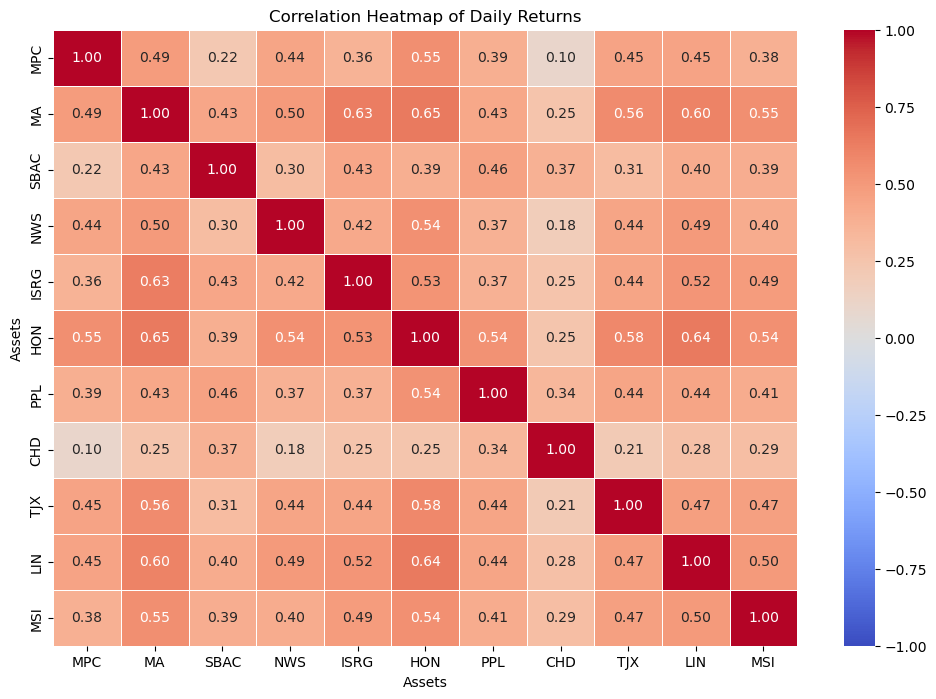

In [24]:
# Calculate the correlation matrix of the daily returns
corr_matrix = daily_returns.corr()

# Display the correlation matrix
display(corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Heatmap of Daily Returns')
plt.xlabel('Assets')
plt.ylabel('Assets')

# Show the plot
plt.show()

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
# Standardize the daily returns
scaler = StandardScaler()
scaled_returns = scaler.fit_transform(daily_returns)

# Transform to DataFrame
scaled_returns = pd.DataFrame(scaled_returns)

# Rename columns 
scaled_returns.columns = [f'{col}' for col in daily_returns.columns]

In [27]:
# Initialize PCA
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_returns)

# Transform the data
pca_transformed = pca.transform(scaled_returns)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(pca_transformed, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

In [28]:
# Calculate the covariance matrix of the daily returns
pca_cov_matrix = pca_df.cov()

# Display the covariance matrix
display(pca_cov_matrix)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PC1,5.357781e+00,3.307945e-14,2.987471e-16,1.425838e-16,-2.580088e-16,7.808162e-17,-2.325474e-16,3.165700e-16,2.376397e-17,3.836184e-16,1.765324e-16
PC2,3.307945e-14,1.119723e+00,-4.657314e-16,-8.232519e-17,-2.015694e-17,5.431765e-17,3.819210e-18,8.508350e-17,2.546140e-17,8.911489e-17,-1.527684e-16
PC3,2.987471e-16,-4.657314e-16,7.234605e-01,1.103327e-16,6.789706e-17,-8.953925e-17,-6.789706e-17,1.432204e-16,2.036912e-16,2.002963e-16,-2.983227e-16
PC4,1.425838e-16,-8.232519e-17,1.103327e-16,6.276058e-01,5.287484e-16,1.103327e-16,-4.752794e-17,2.411407e-16,3.182675e-16,2.580088e-16,-5.877339e-17
PC5,-2.580088e-16,-2.015694e-17,6.789706e-17,5.287484e-16,5.916726e-01,-1.256096e-16,1.137276e-16,-2.359423e-16,-2.019938e-16,2.503704e-17,4.837666e-17
PC6,7.808162e-17,5.431765e-17,-8.953925e-17,1.103327e-16,-1.256096e-16,5.238671e-01,-3.564596e-17,-9.929945e-17,1.951510e-16,-8.487133e-18,-1.016334e-16
PC7,-2.325474e-16,3.819210e-18,-6.789706e-17,-4.752794e-17,1.137276e-16,-3.564596e-17,5.088905e-01,-8.062776e-17,-2.715882e-17,1.018456e-17,-7.426241e-18
PC8,3.165700e-16,8.508350e-17,1.432204e-16,2.411407e-16,-2.359423e-16,-9.929945e-17,-8.062776e-17,4.782595e-01,2.384884e-16,-6.195607e-17,3.840427e-17
PC9,2.376397e-17,2.546140e-17,2.036912e-16,3.182675e-16,-2.019938e-16,1.951510e-16,-2.715882e-17,2.384884e-16,4.403041e-01,-4.158695e-17,-7.638419e-17
PC10,3.836184e-16,8.911489e-17,2.002963e-16,2.580088e-16,2.503704e-17,-8.487133e-18,1.018456e-17,-6.195607e-17,-4.158695e-17,3.301959e-01,-3.946517e-17


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
PC1,1.000000e+00,1.358262e-14,1.805969e-16,6.735677e-17,-2.892857e-16,9.958976e-17,-1.276306e-16,1.991301e-16,9.255650e-18,3.177295e-16,9.641891e-17
PC2,1.358262e-14,1.000000e+00,-4.004385e-16,-1.057825e-16,-3.004319e-17,7.540894e-17,2.836297e-17,1.006649e-16,9.383713e-17,1.697956e-16,-3.423737e-16
PC3,1.805969e-16,-4.004385e-16,1.000000e+00,2.141996e-16,9.972360e-17,-9.664643e-17,-1.262813e-16,2.360077e-16,2.527954e-16,3.648219e-16,-5.381521e-16
PC4,6.735677e-17,-1.057825e-16,2.141996e-16,1.000000e+00,7.946575e-16,1.763046e-16,-8.473305e-17,3.904393e-16,6.036822e-16,5.506878e-16,-1.678589e-16
PC5,-2.892857e-16,-3.004319e-17,9.972360e-17,7.946575e-16,1.000000e+00,-2.296869e-16,2.295893e-16,-4.131767e-16,-4.275772e-16,1.512116e-17,9.536910e-17
PC6,9.958976e-17,7.540894e-17,-9.664643e-17,1.763046e-16,-2.296869e-16,1.000000e+00,-5.534445e-17,-1.720942e-16,4.197822e-16,2.797972e-17,-2.612830e-16
PC7,-1.276306e-16,2.836297e-17,-1.262813e-16,-8.473305e-17,2.295893e-16,-5.534445e-17,1.000000e+00,-1.140001e-16,-5.499368e-17,6.748346e-17,4.399333e-17
PC8,1.991301e-16,1.006649e-16,2.360077e-16,3.904393e-16,-4.131767e-16,-1.720942e-16,-1.140001e-16,1.000000e+00,6.109036e-16,-2.074480e-16,9.885984e-17
PC9,9.255650e-18,9.383713e-17,2.527954e-16,6.036822e-16,-4.275772e-16,4.197822e-16,-5.499368e-17,6.109036e-16,1.000000e+00,-9.218211e-17,-1.993180e-16
PC10,3.177295e-16,1.697956e-16,3.648219e-16,5.506878e-16,1.512116e-17,2.797972e-17,6.748346e-17,-2.074480e-16,-9.218211e-17,1.000000e+00,-1.805128e-16


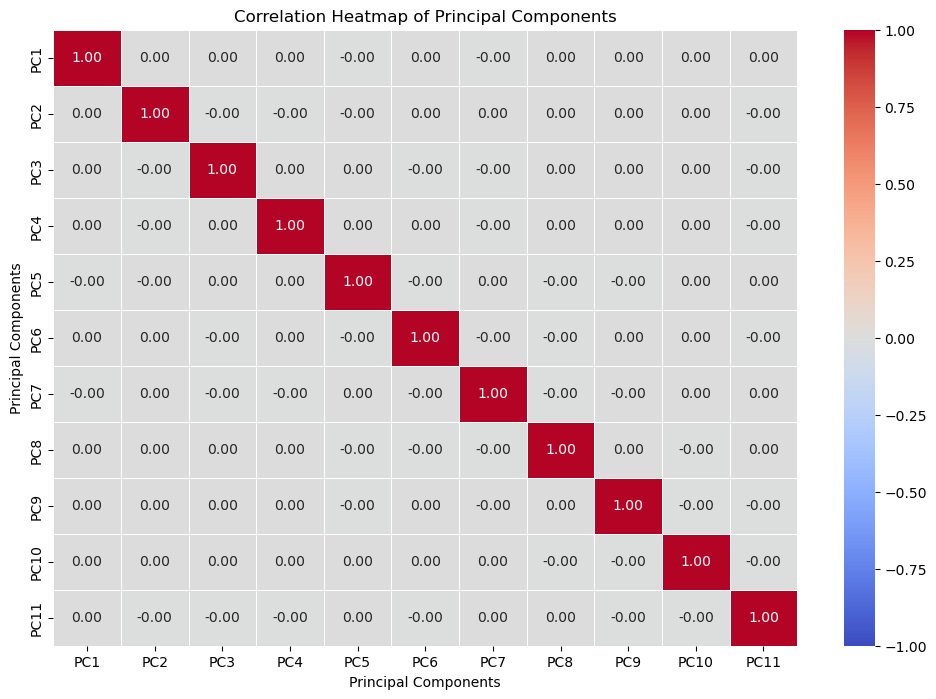

In [29]:
# Calculate the correlation matrix of the principal components
pca_corr_matrix = pca_df.corr()

# Display the correlation matrix
display(pca_corr_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(pca_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Correlation Heatmap of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Principal Components')

# Show the plot
plt.show()

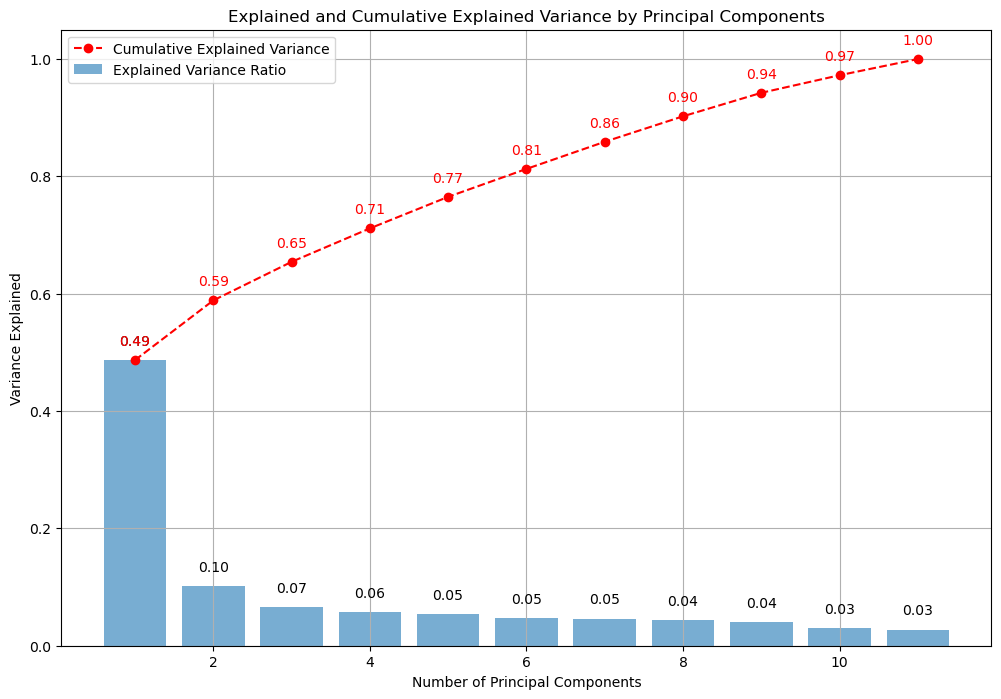

In [30]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the explained variance as bars and cumulative explained variance as a line
plt.figure(figsize=(12, 8))

# Plot explained variance as bars
bars = plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, label='Explained Variance Ratio')

# Plot cumulative explained variance as a line
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='r', label='Cumulative Explained Variance', linestyle='--')

# Add annotations for explained variance ratio
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center', va='bottom')

# Add annotations for cumulative explained variance
for i, value in enumerate(cumulative_explained_variance):
    plt.text(i + 1, value + 0.02, f'{value:.2f}', ha='center', va='bottom', color='r')

# Add titles and labels
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained and Cumulative Explained Variance by Principal Components')
plt.legend()  # Show legend to differentiate the bars and the line
plt.grid(True)

# Show the plot
plt.show()

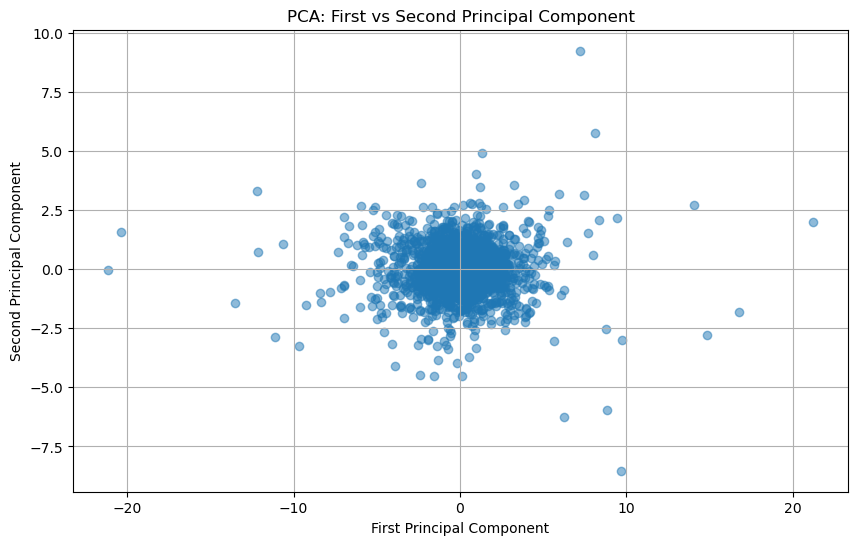

In [31]:
# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: First vs Second Principal Component')
plt.grid(True)
plt.show()

In [32]:
# Obtain the loadings
loadings = pca.components_.T  # Transpose so that each variable is an index

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings, index=scaled_returns.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Display the DataFrame with loadings
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
MPC,0.277154,-0.383298,-0.393791,0.007029,-0.016970,0.645227,0.018993,-0.419968,-0.051591,0.148947,0.054412
MA,0.352762,-0.098321,0.288582,-0.007449,-0.068565,0.075456,-0.197218,-0.035624,-0.029296,-0.729300,0.446387
SBAC,0.258982,0.476588,0.117807,0.566752,0.248343,0.000402,0.070747,-0.323211,-0.432377,0.025646,-0.109328
NWS,0.291159,-0.222710,-0.088476,-0.259761,0.708636,-0.436250,0.158055,-0.216891,0.144203,0.028529,0.064901
ISRG,0.312812,0.033832,0.543488,0.097522,0.023657,0.163035,-0.320077,-0.058647,0.562631,0.355718,-0.141408
HON,0.359868,-0.156926,-0.110184,-0.016813,-0.025594,0.006595,-0.023328,0.276633,-0.052939,-0.339056,-0.798696
PPL,0.289922,0.213313,-0.552500,0.410301,-0.075197,-0.117008,0.058810,0.315430,0.464280,-0.018097,0.242188
CHD,0.179026,0.677684,-0.213500,-0.625122,-0.025807,0.141207,-0.186270,-0.119522,0.027244,-0.030678,-0.032620
TJX,0.309480,-0.174734,-0.120670,-0.033339,-0.487974,-0.540460,-0.376755,-0.220801,-0.256032,0.264233,0.041625
LIN,0.334769,-0.052244,0.103335,-0.129356,0.176256,0.180334,-0.021941,0.649636,-0.427856,0.356498,0.248077


In [33]:
# Check if the loadings matrix is orthonormal by verifying if it approximates the identity matrix.
np.round(loadings.T @ loadings, 0)

array([[ 1., -0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0.],
       [-0.,  1., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0.],
       [ 0., -0.,  1., -0.,  0.,  0., -0., -0.,  0.,  0., -0.],
       [-0., -0., -0.,  1.,  0.,  0., -0.,  0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0.,  1., -0.,  0., -0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0., -0.,  1., -0.,  0.,  0., -0., -0.],
       [-0.,  0., -0., -0.,  0., -0.,  1., -0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0., -0.,  0., -0.,  1.,  0., -0.,  0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  1., -0., -0.],
       [-0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  1.,  0.],
       [ 0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  1.]])

In [34]:
def adjust_weights(pca, loadings, num_components_to_keep):
    """
    Adjust the portfolio composition vector to include only a specified number of principal components
    and set the weights of the remaining components to zero.

    Parameters:
    ----------
    pca : sklearn.decomposition.PCA
        Fitted PCA object that contains the eigenvalues of the principal components.
    loadings : numpy.ndarray
        Matrix of PCA loadings (principal component vectors) that maps the PCA space to the original space.
    num_components_to_keep : int
        Number of principal components to keep in the portfolio composition vector. All other components will be set to zero.

    Returns:
    -------
    pd.DataFrame
        DataFrame containing the portfolio weights in the original asset space with the specified number of principal components.
    """
    
    # Get the eigenvalues from the PCA object
    eigenvalues = pca.explained_variance_
    
    # Calculate the portfolio composition vector in the PCA space
    weight_vector_pca_space = 1 / eigenvalues
    
    # Create a zero vector for weights
    weight_vector_pca_space_zeroed = np.zeros_like(weight_vector_pca_space)
    
    # Set weights for the top `num_components_to_keep` components
    weight_vector_pca_space_zeroed[:num_components_to_keep] = weight_vector_pca_space[:num_components_to_keep]
    
    # Normalize the portfolio composition vector so that its components sum to 1
    weight_vector_pca_space_zeroed /= weight_vector_pca_space_zeroed.sum()
    
    # Transform to the original space using the loadings matrix
    weight_vector_original_space = loadings @ weight_vector_pca_space_zeroed
    
    # Normalize the final weights so that they sum to 1 (just in case)
    weight_vector_original_space /= weight_vector_original_space.sum()
    
    # Convert to a DataFrame for better readability
    portfolio_weights = pd.DataFrame(weight_vector_original_space, index=scaled_returns.columns, columns=['Portfolio Composition'])
    
    return portfolio_weights

# Example usage:
num_components_to_keep = 3  # Specify the number of components to keep
portfolio_weights = adjust_weights(pca, loadings, num_components_to_keep)

# Display the portfolio weights
portfolio_weights

,Portfolio Composition
MPC,-1.230729
MA,0.555624
SBAC,0.938716
NWS,-0.393362
ISRG,1.237997
HON,-0.332087
PPL,-0.765165
CHD,0.506396
TJX,-0.390761
LIN,0.233879


In [35]:
portfolio_weights.sum()

Portfolio Composition    1.0
dtype: float64

In [36]:
# Ensure the weights are in the correct shape
portfolio_weights = portfolio_weights.squeeze()  # Convert to Series if it's a DataFrame

# Verify and align the names of columns and indices
print(daily_returns.columns)
print(portfolio_weights.index)

# Reorder portfolio_weights to match the order of the columns in daily_returns
portfolio_weights = portfolio_weights.reindex(daily_returns.columns)

# Alternatively, keep only the matching columns and indices
common_assets = daily_returns.columns.intersection(portfolio_weights.index)
daily_returns = daily_returns[common_assets]
portfolio_weights = portfolio_weights[common_assets]

# Calculate the daily portfolio returns
portfolio_returns = daily_returns.dot(portfolio_weights)

# Convert the result to a DataFrame for better visualization
portfolio_returns_df = pd.DataFrame(portfolio_returns, columns=['Portfolio Return'])

Index(['MPC', 'MA', 'SBAC', 'NWS', 'ISRG', 'HON', 'PPL', 'CHD', 'TJX', 'LIN',
       'MSI'],
      dtype='object')
Index(['MPC', 'MA', 'SBAC', 'NWS', 'ISRG', 'HON', 'PPL', 'CHD', 'TJX', 'LIN',
       'MSI'],
      dtype='object')


In [37]:
# Display the first few rows of the portfolio returns
portfolio_returns_df.head()

,Portfolio Return
Date,
2015-01-05,-0.011013
2015-01-06,0.013971
2015-01-07,0.013402
2015-01-08,0.023305
2015-01-09,-0.001636


In [38]:
# Summary statistics
portfolio_returns_df.describe()

,Portfolio Return
count,2094.000000
mean,0.001374
std,0.045755
min,-0.226626
25%,-0.023414
50%,0.002448
75%,0.027280
max,0.265171


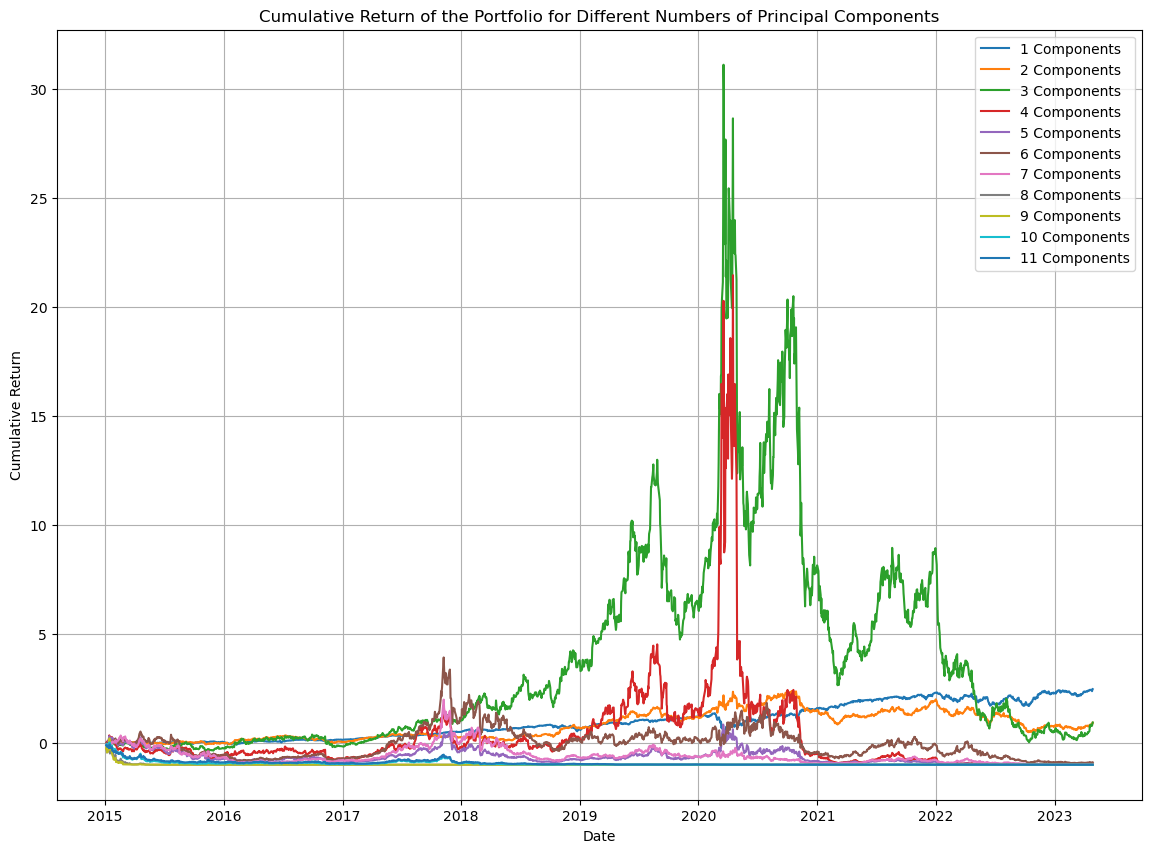

In [39]:
def calculate_cumulative_returns(daily_returns, pca, loadings, max_components):
    """
    Calculate and plot the cumulative returns for portfolio compositions with different numbers of principal components.

    Parameters:
    ----------
    daily_returns : pd.DataFrame
        DataFrame containing the daily returns of the assets.
    pca : sklearn.decomposition.PCA
        Fitted PCA object that contains the eigenvalues of the principal components.
    loadings : numpy.ndarray
        Matrix of PCA loadings (principal component vectors) that maps the PCA space to the original space.
    max_components : int
        Maximum number of principal components to use for portfolio composition.

    Returns:
    -------
    None
    """
    
    # Prepare a figure for plotting
    plt.figure(figsize=(14, 10))
    
    # Iterate over the number of components from 1 to max_components
    for num_components in range(1, max_components + 1):
        # Get the eigenvalues from the PCA object
        eigenvalues = pca.explained_variance_
        
        # Calculate the portfolio composition vector in the PCA space
        weight_vector_pca_space = 1 / eigenvalues
        
        # Create a zero vector for weights
        weight_vector_pca_space_zeroed = np.zeros_like(weight_vector_pca_space)
        
        # Set weights for the top `num_components` components
        weight_vector_pca_space_zeroed[:num_components] = weight_vector_pca_space[:num_components]
        
        # Normalize the portfolio composition vector so that its components sum to 1
        weight_vector_pca_space_zeroed /= weight_vector_pca_space_zeroed.sum()
        
        # Transform to the original space using the loadings matrix
        weight_vector_original_space = loadings @ weight_vector_pca_space_zeroed
        
        # Normalize the final weights so that they sum to 1 (just in case)
        weight_vector_original_space /= weight_vector_original_space.sum()
        
        # Convert to Series for easy multiplication
        portfolio_weights = pd.Series(weight_vector_original_space, index=daily_returns.columns)
        
        # Reorder portfolio_weights to match the order of the columns in daily_returns
        portfolio_weights = portfolio_weights.reindex(daily_returns.columns)
        
        # Alternatively, keep only the matching columns and indices
        common_assets = daily_returns.columns.intersection(portfolio_weights.index)
        daily_returns_filtered = daily_returns[common_assets]
        portfolio_weights_filtered = portfolio_weights[common_assets]
        
        # Calculate the daily portfolio returns
        portfolio_returns = daily_returns_filtered.dot(portfolio_weights_filtered)
        
        # Convert the result to a DataFrame for better visualization
        portfolio_returns_df = pd.DataFrame(portfolio_returns, columns=['Portfolio Return'])
        
        # Calculate the cumulative return
        portfolio_returns_df['Cumulative Return'] = (1 + portfolio_returns_df['Portfolio Return']).cumprod() - 1
        
        # Plot the cumulative return
        plt.plot(portfolio_returns_df.index, portfolio_returns_df['Cumulative Return'], label=f'{num_components} Components')
    
    # Add labels and title to the plot
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.title('Cumulative Return of the Portfolio for Different Numbers of Principal Components')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
calculate_cumulative_returns(daily_returns, pca, loadings, max_components=11)